In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
import glob

# path = '2020'  
csv_files = glob.glob('Abu_Dhabi/44_HAM/*.csv', recursive= True) # ALL csv in the folder

# List 
dfs = []

# Iterate through the list of files
for filename in csv_files:
    df = pd.read_csv(filename)
    dfs.append(df)

# Concatenate all the dataframes in the list into a single dataframe
combined_df = pd.concat(dfs, ignore_index=True)


print(combined_df.shape)

(278, 38)


In [3]:
# df = combined_df.drop(columns=['DeletedReason', 'PitInTime', 'PitOutTime'])

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                55 non-null     object 
 1   Driver              55 non-null     object 
 2   DriverNumber        55 non-null     int64  
 3   LapTime             55 non-null     object 
 4   LapNumber           55 non-null     float64
 5   Stint               55 non-null     float64
 6   PitOutTime          1 non-null      object 
 7   PitInTime           2 non-null      object 
 8   Sector1Time         54 non-null     object 
 9   Sector2Time         55 non-null     object 
 10  Sector3Time         55 non-null     object 
 11  Sector1SessionTime  54 non-null     object 
 12  Sector2SessionTime  55 non-null     object 
 13  Sector3SessionTime  55 non-null     object 
 14  SpeedI1             48 non-null     float64
 15  SpeedI2             55 non-null     float64
 16  SpeedFL   

In [5]:
df['LapTime'] = pd.to_timedelta(df['LapTime'])

df['LapTime'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 55 entries, 0 to 54
Series name: LapTime
Non-Null Count  Dtype          
--------------  -----          
55 non-null     timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 572.0 bytes


<Axes: >

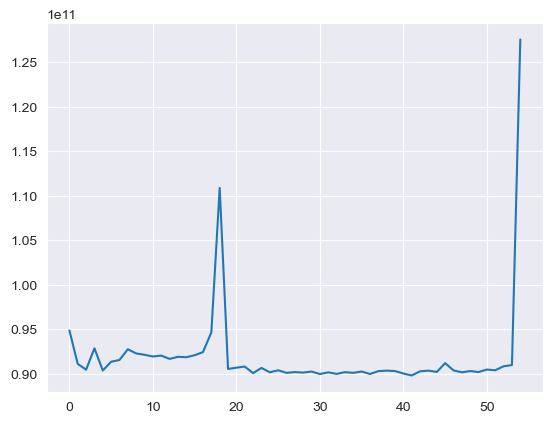

In [6]:
df['LapTime'].plot()

In [7]:
df.groupby(['TrackTemp'])['LapTime'].mean() #중요

TrackTemp
31.9      0 days 00:01:39.794500
32.0   0 days 00:01:30.447666666
32.1      0 days 00:01:30.320500
32.3      0 days 00:01:31.178000
32.4      0 days 00:01:30.140750
32.5      0 days 00:01:30.195000
32.6   0 days 00:01:30.172333333
32.7      0 days 00:01:30.126000
32.8      0 days 00:01:30.127500
32.9      0 days 00:01:30.278750
33.0   0 days 00:01:30.308666666
33.1      0 days 00:01:30.664000
33.2      0 days 00:01:30.523000
33.3   0 days 00:01:37.700666666
33.4      0 days 00:01:33.527000
33.5      0 days 00:01:31.840000
33.7      0 days 00:01:31.655000
33.9      0 days 00:01:31.945000
34.0      0 days 00:01:31.760400
34.2      0 days 00:01:31.532000
34.3      0 days 00:01:32.842000
34.8      0 days 00:01:34.864000
34.9      0 days 00:01:30.767500
Name: LapTime, dtype: timedelta64[ns]

In [8]:
df.groupby(['TrackTemp'])['LapTime'].agg(['mean',"count"])

,mean,count
TrackTemp,,
31.9,0 days 00:01:39.794500,4
32.0,0 days 00:01:30.447666666,3
32.1,0 days 00:01:30.320500,2
32.3,0 days 00:01:31.178000,1
32.4,0 days 00:01:30.140750,4
32.5,0 days 00:01:30.195000,2
32.6,0 days 00:01:30.172333333,3
32.7,0 days 00:01:30.126000,3
32.8,0 days 00:01:30.127500,4


<Axes: xlabel='TrackTemp'>

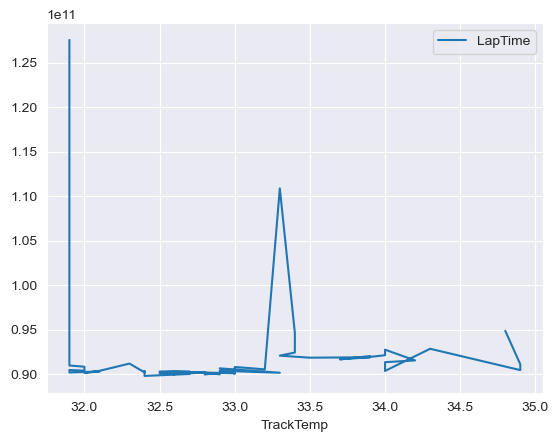

In [9]:
df.plot(x='TrackTemp', y='LapTime')

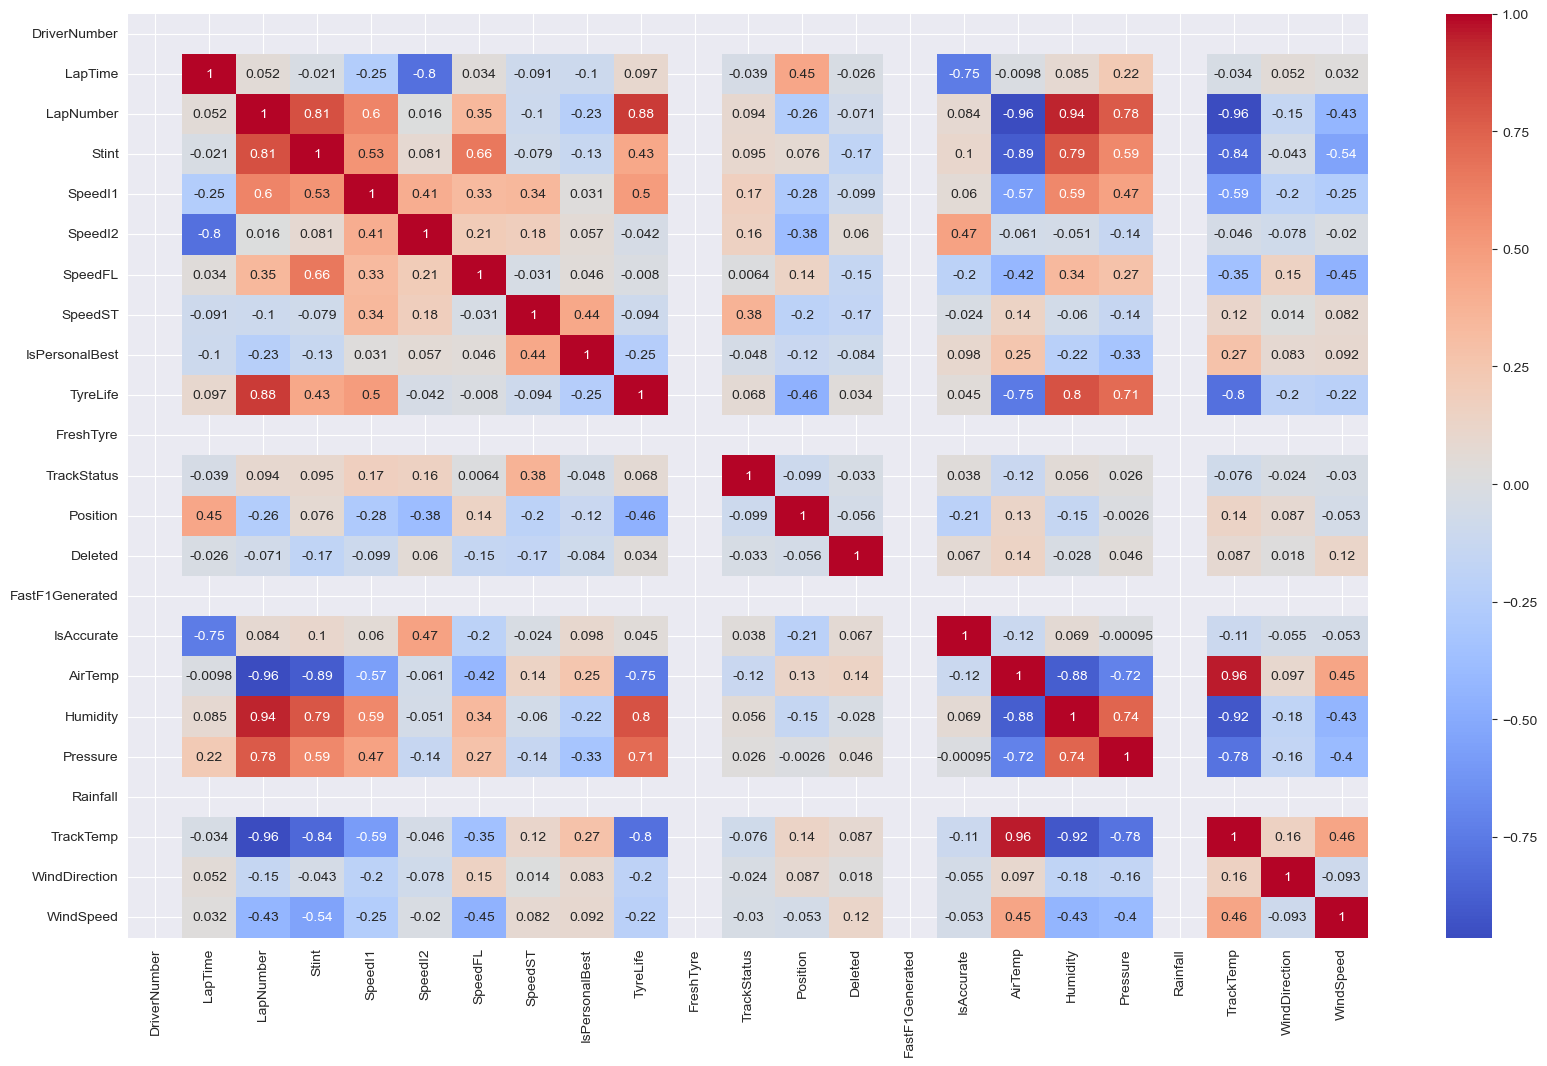

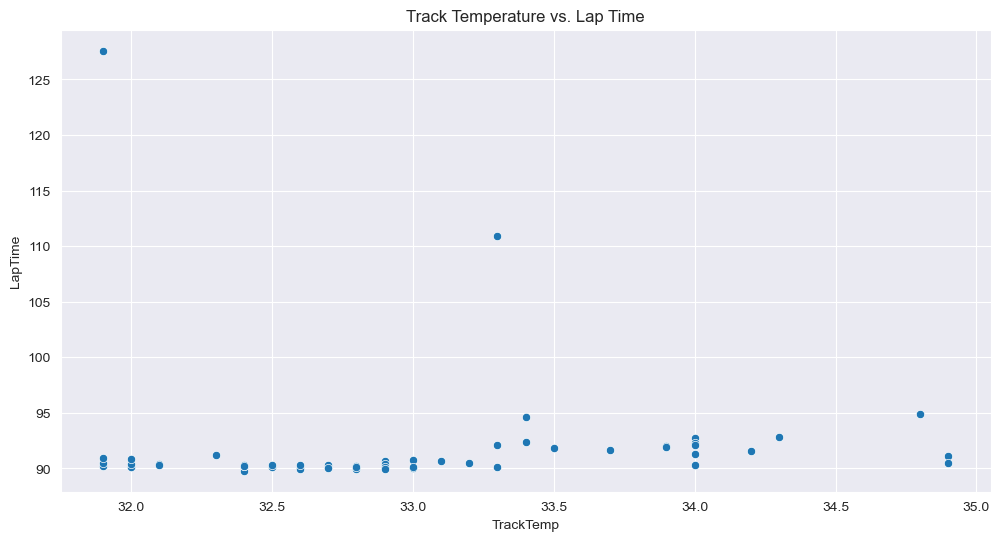

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df['LapTime'] = df['LapTime'].dt.total_seconds()



corr_matrix = df.corr(numeric_only=True)

# Heatmap to visualize correlations
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Scatter plot for Track Temperature vs. Lap Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TrackTemp', y='LapTime', data=df)
plt.title('Track Temperature vs. Lap Time')
plt.show()



In [11]:
""" from sklearn.preprocessing import StandardScaler

df['LapTime'] = df['LapTime'].dt.total_seconds()


Scaler = StandardScaler().fit(df)

df = Scaler.transform(df) 

plt.title( 'Track Temperature vs. Lap Time (Outliers Removed) ')

df.plot(x='LapTime', y='TrackTemp') """

" from sklearn.preprocessing import StandardScaler\n\ndf['LapTime'] = df['LapTime'].dt.total_seconds()\n\n\nScaler = StandardScaler().fit(df)\n\ndf = Scaler.transform(df) \n\nplt.title( 'Track Temperature vs. Lap Time (Outliers Removed) ')\n\ndf.plot(x='LapTime', y='TrackTemp') "

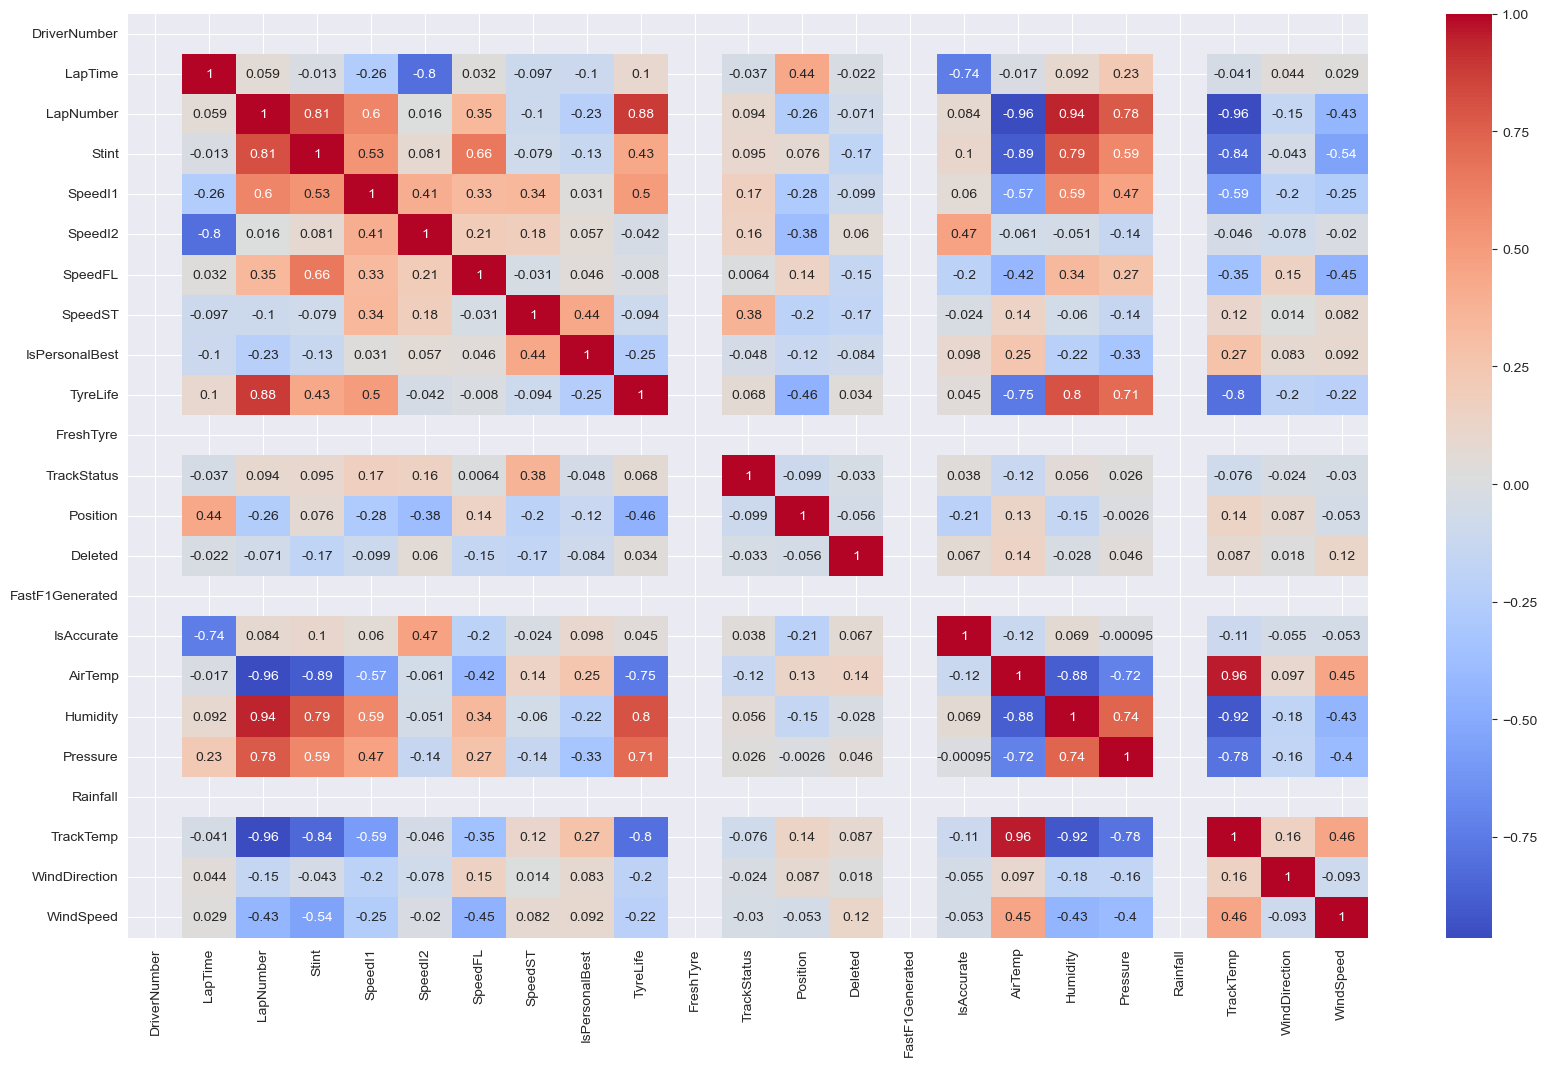

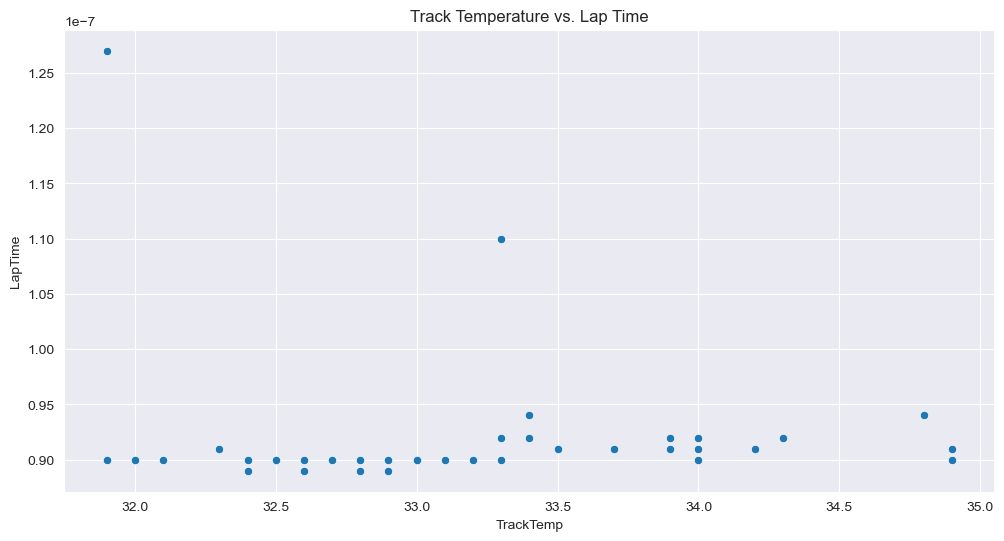

In [12]:
df['LapTime'] = pd.to_timedelta(df['LapTime'])

df['LapTime'] = df['LapTime'].dt.total_seconds()


corr_matrix = df.corr(numeric_only=True)

# Heatmap to visualize correlations
plt.figure(figsize=(20, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Scatter plot for Track Temperature vs. Lap Time
plt.figure(figsize=(12, 6))
sns.scatterplot(x='TrackTemp', y='LapTime', data=df)
plt.title('Track Temperature vs. Lap Time')
plt.show()
